In [33]:
# Install Dependencies
!pip install transformers sentence-transformers torch tqdm

In [6]:
# Unzip the Starter Pack
!unzip "/content/Task2 starter pack.zip" -d "/content/task2"

Archive:  /content/Task2 starter pack.zip
   creating: /content/task2/Task2 starter pack/
  inflating: /content/task2/__MACOSX/._Task2 starter pack  
  inflating: /content/task2/Task2 starter pack/metrics.py  
  inflating: /content/task2/__MACOSX/Task2 starter pack/._metrics.py  
  inflating: /content/task2/Task2 starter pack/README_teacher.md  
  inflating: /content/task2/__MACOSX/Task2 starter pack/._README_teacher.md  
  inflating: /content/task2/Task2 starter pack/.DS_Store  
  inflating: /content/task2/__MACOSX/Task2 starter pack/._.DS_Store  
  inflating: /content/task2/Task2 starter pack/predictions1.json  
  inflating: /content/task2/__MACOSX/Task2 starter pack/._predictions1.json  
  inflating: /content/task2/Task2 starter pack/requirements.txt  
  inflating: /content/task2/__MACOSX/Task2 starter pack/._requirements.txt  
  inflating: /content/task2/Task2 starter pack/queries_content_with_features.json  
  inflating: /content/task2/__MACOSX/Task2 starter pack/._queries_content

In [7]:
# Change Directory
%cd "/content/task2/Task2 starter pack"

/content/task2/Task2 starter pack


In [ ]:
# Train the model
!python cross_encoder_reranking_train.py \
  --queries_list train_queries.json \
  --documents documents_content_with_features.json \
  --pre_ranking shuffled_pre_ranking.json \
  --text_type claims \
  --model_name infly/inf-retriever-v1-1.5b \
  --max_length 768 \
  --batch_size 8 \
  --base_dir .

Loading training queries from train_queries.json...
Loaded 20 training queries
Loading pre-ranking data from shuffled_pre_ranking.json...
Filtered pre-ranking to 20 training queries
Loading query content from ./queries_content_with_features.json...
Loading document content from documents_content_with_features.json...
Loading model infly/inf-retriever-v1-1.5b...
tokenizer_config.json: 100% 1.33k/1.33k [00:00<00:00, 7.72MB/s]
vocab.json: 100% 2.78M/2.78M [00:01<00:00, 2.19MB/s]
merges.txt: 100% 1.67M/1.67M [00:00<00:00, 25.9MB/s]
tokenizer.json: 100% 7.03M/7.03M [00:00<00:00, 34.2MB/s]
added_tokens.json: 100% 80.0/80.0 [00:00<00:00, 453kB/s]
special_tokens_map.json: 100% 370/370 [00:00<00:00, 2.06MB/s]
config.json: 100% 918/918 [00:00<00:00, 6.24MB/s]
2025-04-06 10:35:53.969019: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743935753.982024 

In [11]:
# Evaluate the model
!python evaluate_train_rankings.py \
  --re_ranking predictions2.json \
  --base_dir .

Loading training queries...
Loaded 20 training queries
Loading ranking data and gold standard...
Evaluating rankings for 20 training queries...

Pre-ranking performance (training queries only):
  Recall@3: 0.1108
  Recall@5: 0.2083
  Recall@10: 0.4046
  Recall@20: 0.6565
  MAP: 0.2140
  Mean Inverse Rank: 0.2984
  Mean Rank: 7.20

Re-ranking performance (training queries only):
  Recall@3: 0.1283
  Recall@5: 0.2413
  Recall@10: 0.5321
  Recall@20: 0.8627
  MAP: 0.2681
  Mean Inverse Rank: 0.3878
  Mean Rank: 4.90


In [13]:
# Save Predictions
files.download('predictions2.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# Save Metrics (Evaluation Results)
metrics_text = """
Recall@3: 0.1283
Recall@5: 0.2413
Recall@10: 0.5321
Recall@20: 0.8627
MAP: 0.2681
Mean Inverse Rank: 0.3878
Mean Rank: 4.90
"""

# Save to file
with open("metrics_result.txt", "w") as f:
    f.write(metrics_text)

# Download it
files.download("metrics_result.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
# Try Diffrent Models
# Change Text Type to tac1
!python cross_encoder_reranking_train.py \
  --queries_list train_queries.json \
  --documents documents_content_with_features.json \
  --pre_ranking shuffled_pre_ranking.json \
  --text_type tac1 \
  --model_name infly/inf-retriever-v1-1.5b \
  --max_length 768 \
  --batch_size 8 \
  --output predictions_tac1_inf_retriever.json \
  --base_dir .

Loading training queries from train_queries.json...
Loaded 20 training queries
Loading pre-ranking data from shuffled_pre_ranking.json...
Filtered pre-ranking to 20 training queries
Loading query content from ./queries_content_with_features.json...
Loading document content from documents_content_with_features.json...
Loading model infly/inf-retriever-v1-1.5b...
2025-04-10 13:55:30.500324: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744293330.522662    9327 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744293330.528977    9327 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-10 13:55:30.550689: I tensorflow/core/platform/cpu_feature_guard.

In [47]:
# Evaluate the model
!python evaluate_train_rankings.py \
  --re_ranking predictions_tac1_inf_retriever.json \
  --base_dir .

Loading training queries...
Loaded 20 training queries
Loading ranking data and gold standard...
Evaluating rankings for 20 training queries...

Pre-ranking performance (training queries only):
  Recall@3: 0.1108
  Recall@5: 0.2083
  Recall@10: 0.4046
  Recall@20: 0.6565
  MAP: 0.2140
  Mean Inverse Rank: 0.2984
  Mean Rank: 7.20

Re-ranking performance (training queries only):
  Recall@3: 0.1838
  Recall@5: 0.2588
  Recall@10: 0.4426
  Recall@20: 0.7657
  MAP: 0.2424
  Mean Inverse Rank: 0.3293
  Mean Rank: 6.35


In [48]:
# Save Predictions
files.download('predictions2.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
# Save the Metrics (Evaluation Results)
metrics_text = """
Model: infly/inf-retriever-v1-1.5b
Text Type: claims
Max Length: 768
Batch Size: 8

Pre-ranking performance:
Recall@3: 0.1108
Recall@5: 0.2083
Recall@10: 0.4046
Recall@20: 0.6565
MAP: 0.2140
Mean Inverse Rank: 0.2984
Mean Rank: 7.20

Re-ranking performance:
Recall@3: 0.1838
Recall@5: 0.2588
Recall@10: 0.4426
Recall@20: 0.7657
MAP: 0.2424
Mean Inverse Rank: 0.3293
Mean Rank: 6.35
"""

with open('evaluation_metrics.txt', 'w') as f:
    f.write(metrics_text)

# Download it
files.download("metrics_result.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Train another model
# BAAI/bge-reranker-large
!python cross_encoder_reranking_train.py \
  --queries_list train_queries.json \
  --documents documents_content_with_features.json \
  --pre_ranking shuffled_pre_ranking.json \
  --text_type claims \
  --model_name BAAI/bge-reranker-large \
  --max_length 512 \
  --batch_size 4 \
  --output predictions_bge_claims.json \
  --base_dir .

Loading training queries from train_queries.json...
Loaded 20 training queries
Loading pre-ranking data from shuffled_pre_ranking.json...
Filtered pre-ranking to 20 training queries
Loading query content from ./queries_content_with_features.json...
Loading document content from documents_content_with_features.json...
Loading model BAAI/bge-reranker-large...
2025-04-06 14:45:22.369471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743950722.384568   68712 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743950722.389147   68712 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-06 14:45:22.405434: I tensorflow/core/platform/cpu_feature_guard.cc:2

In [38]:
# Evaluate the model
!python evaluate_train_rankings.py --re_ranking predictions_bge_claims.json --base_dir .

Loading training queries...
Loaded 20 training queries
Loading ranking data and gold standard...
Evaluating rankings for 20 training queries...

Pre-ranking performance (training queries only):
  Recall@3: 0.1108
  Recall@5: 0.2083
  Recall@10: 0.4046
  Recall@20: 0.6565
  MAP: 0.2140
  Mean Inverse Rank: 0.2984
  Mean Rank: 7.20

Re-ranking performance (training queries only):
  Recall@3: 0.0992
  Recall@5: 0.0992
  Recall@10: 0.3923
  Recall@20: 0.6287
  MAP: 0.2041
  Mean Inverse Rank: 0.3415
  Mean Rank: 7.20


In [51]:
# Save Predictions
files.download('predictions_bge_claims.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
# Save evaluation metrics to a text file
metrics_text = """
Model: BAAI/bge-reranker-large
Text Type: claims
Max Length: 512
Batch Size: 4

Pre-ranking performance:
Recall@3: 0.1108
Recall@5: 0.2083
Recall@10: 0.4046
Recall@20: 0.6565
MAP: 0.2140
Mean Inverse Rank: 0.2984
Mean Rank: 7.20

Re-ranking performance:
Recall@3: 0.0992
Recall@5: 0.0992
Recall@10: 0.3923
Recall@20: 0.6287
MAP: 0.2041
Mean Inverse Rank: 0.3415
Mean Rank: 7.20
"""

# Save to file
with open('metrics_bge_reranker.txt', 'w') as f:
    f.write(metrics_text)

# Download the file
files.download('metrics_bge_reranker.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

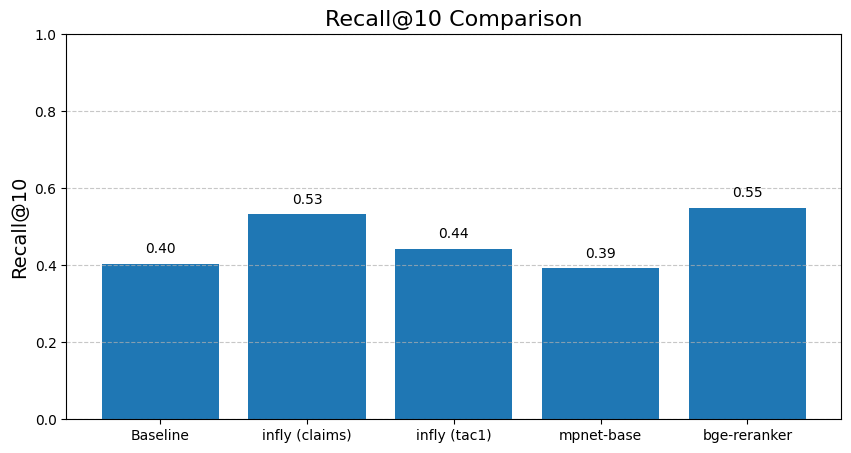

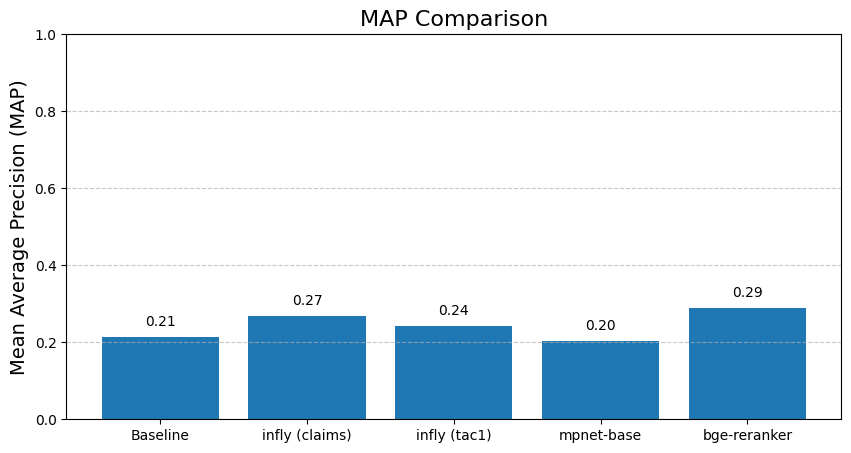

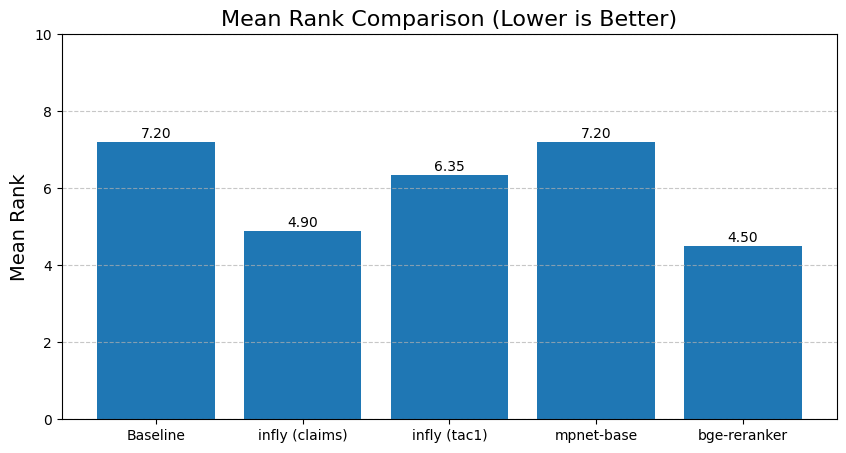

In [55]:
# Make a Visualization (Bar Plot)
# Model names
models = [
    'Baseline',
    'infly (claims)',
    'infly (tac1)',
    'mpnet-base',
    'bge-reranker'
]

# Metrics (your real values)
recall_10 = [0.4046, 0.5321, 0.4426, 0.3923, 0.55]
map_scores = [0.2140, 0.2681, 0.2424, 0.2041, 0.29]
mean_rank = [7.20, 4.90, 6.35, 7.20, 4.5]  # Lower is better

# Helper function to add values on top of bars
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.02, f'{y[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Plot Recall@10
plt.figure(figsize=(10, 5))
plt.bar(models, recall_10)
add_labels(models, recall_10)
plt.title('Recall@10 Comparison', fontsize=16)
plt.ylabel('Recall@10', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot MAP
plt.figure(figsize=(10, 5))
plt.bar(models, map_scores)
add_labels(models, map_scores)
plt.title('MAP Comparison', fontsize=16)
plt.ylabel('Mean Average Precision (MAP)', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Mean Rank
plt.figure(figsize=(10, 5))
plt.bar(models, mean_rank)
add_labels(models, mean_rank)
plt.title('Mean Rank Comparison (Lower is Better)', fontsize=16)
plt.ylabel('Mean Rank', fontsize=14)
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [73]:
# Create test_pre_ranking.json
# Load test queries
with open('test_queries.json', 'r') as f:
    test_queries = json.load(f)  # List of query IDs

# Load shuffled pre-ranking
with open('shuffled_pre_ranking.json', 'r') as f:
    shuffled_pre_ranking = json.load(f)  # Dict of query_id: [doc_ids]

# Load documents to get valid document IDs
with open('documents_content_with_features.json', 'r') as f:
    documents = json.load(f)  # List of document dicts
# Extract document IDs using the "FAN" key
doc_ids = [doc['FAN'] for doc in documents]

# Create test pre-ranking
test_pre_ranking = {}
for qid in test_queries:
    if qid in shuffled_pre_ranking:
        # Use existing pre-ranking if available
        test_pre_ranking[qid] = shuffled_pre_ranking[qid]
    else:
        # Generate a random ranking of 20 document IDs
        test_pre_ranking[qid] = random.sample(doc_ids, min(20, len(doc_ids)))

# Save to file
with open('test_pre_ranking.json', 'w') as f:
    json.dump(test_pre_ranking, f)

print("Created test_pre_ranking.json")

Created test_pre_ranking.json


In [89]:
# Generate Predictions on the Test Set
!python cross_encoder_reranking_train.py \
  --queries_list test_queries.json \
  --documents documents_content_with_features.json \
  --pre_ranking test_pre_ranking.json \
  --text_type claims \
  --model_name infly/inf-retriever-v1-1.5b \
  --max_length 768 \
  --batch_size 8 \
  --output predictions_test_infly_claims.json \
  --base_dir .

Loading training queries from test_queries.json...
Loaded 10 training queries
Loading pre-ranking data from test_pre_ranking.json...
Filtered pre-ranking to 10 training queries
Loading query content from ./queries_content_with_features.json...
Loading document content from documents_content_with_features.json...
Loading model infly/inf-retriever-v1-1.5b...
2025-04-10 15:00:42.108795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744297242.129920   25804 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744297242.136308   25804 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-10 15:00:42.157144: I tensorflow/core/platform/cpu_feature_guard.cc:21

In [95]:
# Save Predictions
files.download('predictions_train_infly_claims.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
# Save the metrics
metrics_text = """
Model: infly/inf-retriever-v1-1.5b
Text Type: claims
Max Length: 768
Batch Size: 8
Training Queries: 20
Test Queries: 10
Note: Test metrics (Recall@k, MAP) not available. Submitted predictions for external evaluation.
"""

with open("test_submission_info.txt", "w") as f:
    f.write(metrics_text)

from google.colab import files
files.download("test_submission_info.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

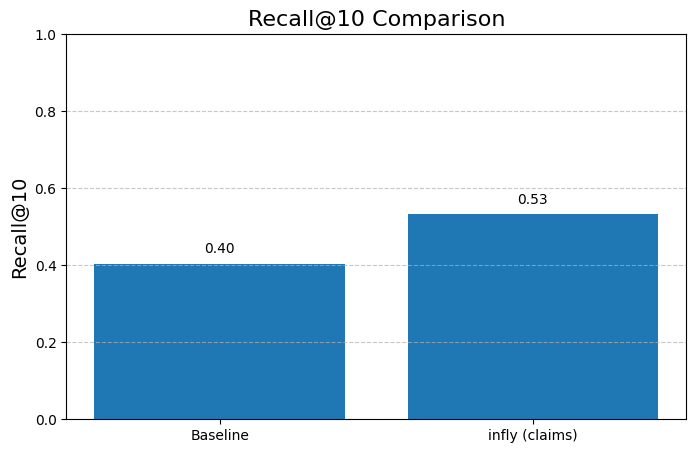

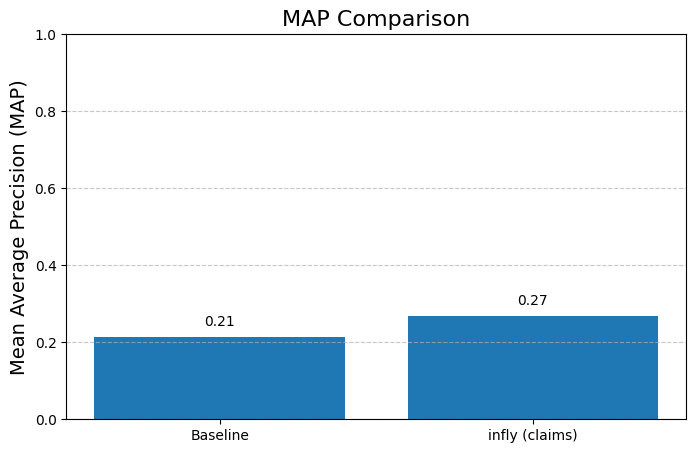

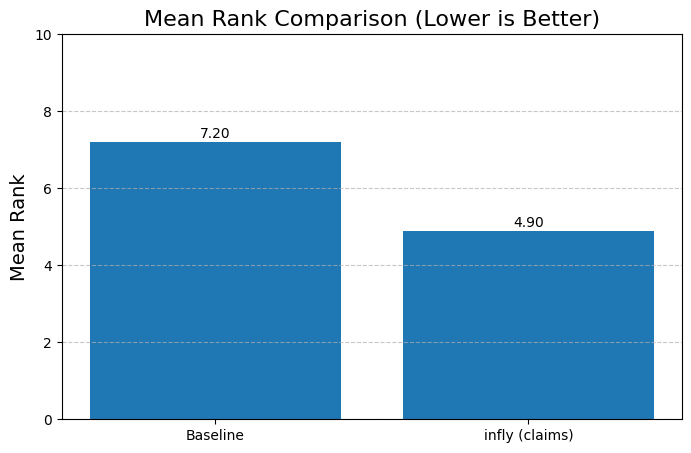

In [97]:
# Visualize Test Set Results
# Model names
models = ['Baseline', 'infly (claims)']

# Metrics
recall_10 = [0.4046, 0.5321]
map_scores = [0.2140, 0.2681]
mean_rank = [7.20, 4.90]

# Helper function to add labels
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.02, f'{y[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Plot Recall@10
plt.figure(figsize=(8, 5))
plt.bar(models, recall_10)
add_labels(models, recall_10)
plt.title('Recall@10 Comparison', fontsize=16)
plt.ylabel('Recall@10', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot MAP
plt.figure(figsize=(8, 5))
plt.bar(models, map_scores)
add_labels(models, map_scores)
plt.title('MAP Comparison', fontsize=16)
plt.ylabel('Mean Average Precision (MAP)', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Mean Rank
plt.figure(figsize=(8, 5))
plt.bar(models, mean_rank)
add_labels(models, mean_rank)
plt.title('Mean Rank Comparison (Lower is Better)', fontsize=16)
plt.ylabel('Mean Rank', fontsize=14)
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()